In [1]:
# load text mining package
library(tm)

Loading required package: NLP


In [2]:
# Read and preprocess data (the file 'online_retail.csv' must be locally available)
data <- read.csv(file = './online_retail.csv', header = TRUE)
set.seed(123)
myData <- data[c('StockCode','Description')] # extract relevant columns
myData <- myData[complete.cases(myData),] # remove incomplete rows

In [3]:
# Reduce the size of dataset for rapid prototyping and create corpus
prototype_size <- 50000
myData <- myData[sample(1:length(myData[,1]),size = prototype_size),] 
corpus = tm::Corpus(tm::VectorSource(myData$Description))

In [4]:
# Build the feature matrices
dtm <- tm::DocumentTermMatrix(corpus)
dtm.tfidf <- tm::weightTfIdf(dtm)

Warning message in tm::weightTfIdf(dtm):
"empty document(s): 64 137 149 259 556 705 925 967 988 1143 1442 1608 1850 1924 1936 2055 2237 2281 2493 2612 2881 2953 3002 3039 3093 3186 3303 3642 4198 4222 4696 4725 4802 4807 5464 5544 5654 6049 6175 6431 6507 7011 7099 8293 8458 8531 8968 9285 9348 9676 9767 10764 10817 10879 10913 11028 11092 11153 11247 11385 11822 12064 12196 12580 12764 13256 13336 13391 13494 13612 13864 13935 14049 14167 14295 14556 14637 15145 15192 15399 15428 15474 15798 15852 15903 15965 16194 16445 16591 17386 17441 17474 17543 17591 17726 18009 18201 18783 19051 19351 19457 19686 19742 19883 20194 20228 20267 20280 20520 20752 20831 20872 21200 21383 21652 22228 22254 22521 22825 22842 22982 23148 23219 23915 24018 24654 24745 24752 24826 25067 25318 25808 25852 25969 26026 26035 26073 26096 26100 26202 26989 27066 27133 27407 27559 27591 27606 27722 27884 28012 28568 28636 28762 28795 28902 28936 29297 29430 29502 29524 29536 29694 29732 29929 30027 30117 3043

In [5]:
# Remove features for optimization
dtm.tfidf <- tm::removeSparseTerms(dtm.tfidf, 0.999)

In [6]:
# There is the memory-problem part
# - Native matrix isn't "sparse-compliant" in the memory
# - Sparse implementations aren't necessary compatible with clustering algorithms
matrix.tfidf <- as.matrix(dtm.tfidf)

In [7]:
# Cluster descriptions according to similarity
n_clusters = 500
clustering.kmeans <- kmeans(matrix.tfidf, n_clusters)
Clusters <- clustering.kmeans$cluster

In [8]:
# Add cluster column to the dataframe
myData_cluster <- cbind("Code" = myData$StockCode, 
                        "Cluster" = Clusters, 
                        "Description" = myData$Description)
myDataFrame_cluster <- as.data.frame(myData_cluster)
attach(myDataFrame_cluster)
clustered_descriptions <- myDataFrame_cluster[order(as.numeric(Cluster)),]
detach(myDataFrame_cluster)

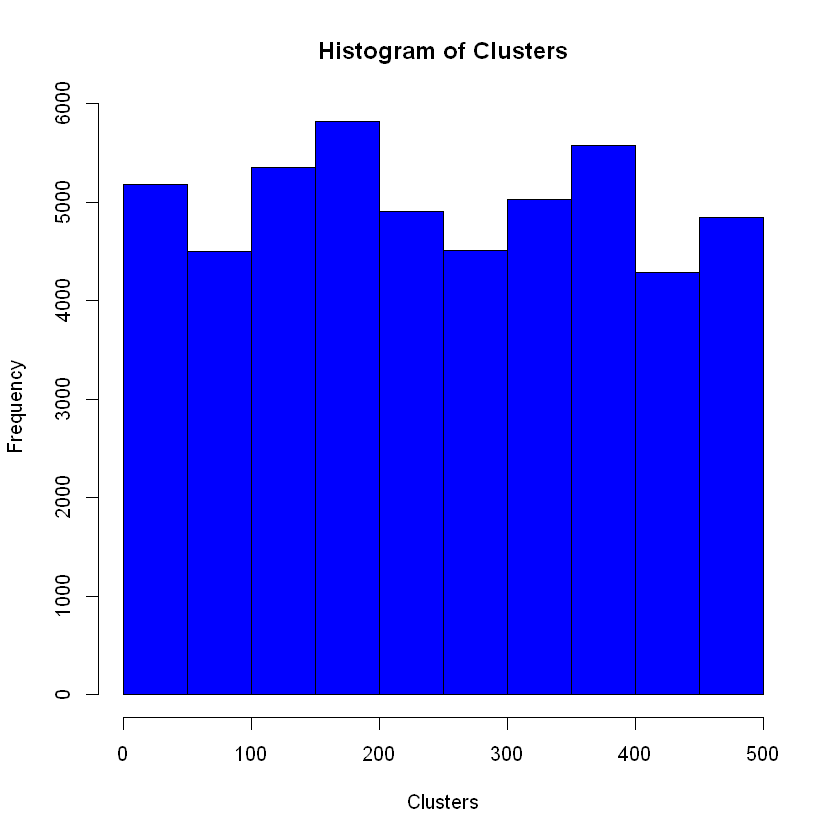

In [9]:
# Plot histogram of clusters
hist(Clusters, col = "blue")

In [10]:
# Print observations belonging to a few random clusters
for (i in sample(c(1:n_clusters),2)) {
  print(clustered_descriptions[clustered_descriptions$Cluster==i,])
}

      Code Cluster Description
1253  1008      34        1246
8872  1008      34        1246
19393 1008      34        1246
23429 1008      34        1246
27301 1008      34        1246
31797 1008      34        1246
44711 1008      34        1246
47616 1008      34        1246
49678 1008      34        1246
      Code Cluster Description
1456  3025     358         510
3517  3025     358         510
4283  3025     358         510
7886  3025     358         510
13230 3070     358        1857
25771 3025     358         510
26152  370     358        1892
31656 3025     358         510
40942 3025     358         510
